# 01. Analysis Seoul CCTV

## 1. 데이터 읽기

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
rc('font',family='Malgun Gothic')

In [3]:
import pandas as pd

### 한글파일은 encoding 필수!

In [4]:
CCTV_Seoul = pd.read_csv("C:/Users/고선욱/Documents/ds_study/data/Seoul_CCTV.csv",encoding="utf-8" ) 
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


### 선택한 컬럼을 보기좋게 이름을 바꾸자

In [5]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]: "구별"}, inplace=True) 
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


### 원본파일 확인하면 정렬이 지저분!

In [6]:
pop_Seoul = pd.read_excel("C:/Users/고선욱/Documents/ds_study/data/Seoul_Population.xls") 
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017,합계,4220082,10124579,4957857,5166722,9857426,4830206,5027220,267153,127651,139502,2.34,1365126
3,2017,종로구,73594,164257,80094,84163,154770,75967,78803,9487,4127,5360,2.1,26182
4,2017,중구,60412,134593,66337,68256,125709,62253,63456,8884,4084,4800,2.08,21384


### 필요한 컬럼만 선택할 때 usecols="", header=""은 원하는 행부터 출력하고 싶을 때!

In [7]:
pop_Seoul = pd.read_excel("C:/Users/고선욱/Documents/ds_study/data/Seoul_Population.xls",header=2,usecols="B, D, G, J, N")


pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


### 보기 좋게 컬럼명을 바꿔보자

In [8]:
pop_Seoul.rename(
    columns={
        pop_Seoul.columns[0]: "구별",
        pop_Seoul.columns[1]: "인구수",
        pop_Seoul.columns[2]: "한국인",
        pop_Seoul.columns[3]: "외국인",
        pop_Seoul.columns[4]: "고령자",
    },
    inplace=True,
)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


---

In [9]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [10]:
CCTV_Seoul.sort_values(by="소계", ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


- 가장 CCTV를 적게 보유한 구 -> 도봉구

In [11]:
CCTV_Seoul.sort_values(by="소계", ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


- 가장 CCTV를 많이 보유한 구 -> 강남구

In [12]:
CCTV_Seoul["최근증가율"] = (
    (CCTV_Seoul["2016년"] + CCTV_Seoul["2015년"] + CCTV_Seoul["2014년"])
    / CCTV_Seoul["2013년도 이전"]
    * 100
)

CCTV_Seoul.sort_values(by="최근증가율", ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


- 최근 3년간 그 전 보유한 갯수 대비 CCTV를 많이 설치한 구 -> 종로구

In [13]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [14]:
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273
5,광진구,372298,357703,14595,43953


In [15]:
pop_Seoul["구별"].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

- unique(): 한번씩 나온 것들의 개수
- 데이터양이 작으면 상관없지만, 많아지면 unique 조사를 통해 데이터를 초반 검증한다

In [16]:
len(pop_Seoul["구별"].unique())

25

In [17]:
pop_Seoul["외국인비율"] = pop_Seoul["외국인"] / pop_Seoul["인구수"] * 100
pop_Seoul["고령자비율"] = pop_Seoul["고령자"] / pop_Seoul["인구수"] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118
4,성동구,312711,304808,7903,41273,2.527254,13.198448
5,광진구,372298,357703,14595,43953,3.920247,11.805865


- 컬럼 연산이 편한 것이 Python의 장점!

In [18]:
pop_Seoul.sort_values(by="인구수", ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
23,강남구,561052,556164,4888,65060,0.871220,11.596073
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


- 인구수가 가장 많은 구 -> 송파구

In [19]:
pop_Seoul.sort_values(by="외국인", ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402024,368550,33474,53981,8.326369,13.427308
17,구로구,441559,410742,30817,58794,6.979135,13.315095
18,금천구,253491,235154,18337,34170,7.233787,13.479769
21,관악구,520929,503297,17632,70046,3.384722,13.446362
6,동대문구,366011,350647,15364,55718,4.197688,15.223040


- 외국인이 가장 많은 구 -> 영등포구

In [20]:
pop_Seoul.sort_values(by="고령자", ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
12,은평구,491202,486794,4408,74559,0.897390,15.178888
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


- 고령자가 가장 많은 구 -> 송파구

In [21]:
pop_Seoul.sort_values(by="고령자비율", ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,328002,324479,3523,56530,1.074079,17.234651
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
10,도봉구,346234,344166,2068,53488,0.597284,15.448512
6,동대문구,366011,350647,15364,55718,4.197688,15.223040


- 고령자비율이 가장 높은 구 -> 강북구

In [22]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on="구별")
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,379,99,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,369,120,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,388,258,184,81,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,846,260,390,613,149.290780,520929,503297,17632,70046,3.384722,13.446362


In [23]:
del data_result["2013년도 이전"]
del data_result["2014년"]
del data_result["2015년"]
del data_result["2016년"]
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


- 필요없는 컬럼 제거

In [24]:
data_result.set_index("구별", inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


- Pandas Index 지정
- 데이터를 정리하는 과정에서 index를 재지정할 때가 있다
- 여기서는 unique한 데이터인 구별로 index를 잡자
- index를 재지정하는 명령은 set_index 이다

### 상관관계
- 두 변량 사이에 한쪽이 증가하면 다른 쪽도 증가(또는 감소)하는 경향이 있을 때, 이 두 변량 사이에는 상관관계가 있다고 함.

- 0.2 이하 : 상관관계가 없거나 무시해도 좋은 수준

- 0.4 이하 : 약한 상관관계
    
- 0.6 이상 : 강한 상관관계    

In [25]:
data_result.corr()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,-0.264378,0.232555,0.227852,0.030421,0.163905,-0.045956,-0.267841
최근증가율,-0.264378,1.000000,-0.097165,-0.086341,-0.156421,-0.072251,-0.047102,0.190396
인구수,0.232555,-0.097165,1.000000,0.998151,-0.167243,0.936737,-0.601076,-0.637414
한국인,0.227852,-0.086341,0.998151,1.000000,-0.226853,0.936155,-0.645463,-0.628360
외국인,0.030421,-0.156421,-0.167243,-0.226853,1.000000,-0.175318,0.838612,-0.021147
고령자,0.163905,-0.072251,0.936737,0.936155,-0.175318,1.000000,-0.620300,-0.348840
외국인비율,-0.045956,-0.047102,-0.601076,-0.645463,0.838612,-0.620300,1.000000,0.242816
고령자비율,-0.267841,0.190396,-0.637414,-0.628360,-0.021147,-0.348840,0.242816,1.000000


- 데이터의 관계를 찾을 때, 최소한의 근거가 있어야 해당 데이터를 비교하는 의미가 존재
- 상관계수를 조사해서 0.2 이상의 데이터를 비교하는 것은 의미가 있다
- CCTV 전체 수(소계)와 가장 상관관계가 있는 데이터는 인구수이다

In [26]:
#인구 대비 CCTV 비율
data_result["CCTV비율"] = data_result["소계"] / data_result["인구수"] * 100
data_result.sort_values(by="CCTV비율", ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
종로구,1619,248.922414,164257,154770,9487,26182,5.775705,15.939656,0.985651
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456
중구,1023,147.699758,134593,125709,8884,21384,6.600640,15.887899,0.760069
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
금천구,1348,100.000000,253491,235154,18337,34170,7.233787,13.479769,0.531774


- CCTV비율이 가장 높은 구 -> 종로구

In [27]:
#인구 대비 CCTV 비율
data_result["CCTV비율"] = data_result["소계"] / data_result["인구수"] * 100
data_result.sort_values(by="CCTV비율", ascending=True).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833


- CCTV비율이 가장 낮은 구 -> 강서구

In [28]:
from matplotlib import rc
plt.rcParams["axes.unicode_minus"] = False
rc("font", family="Malgun Gothic")

In [29]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


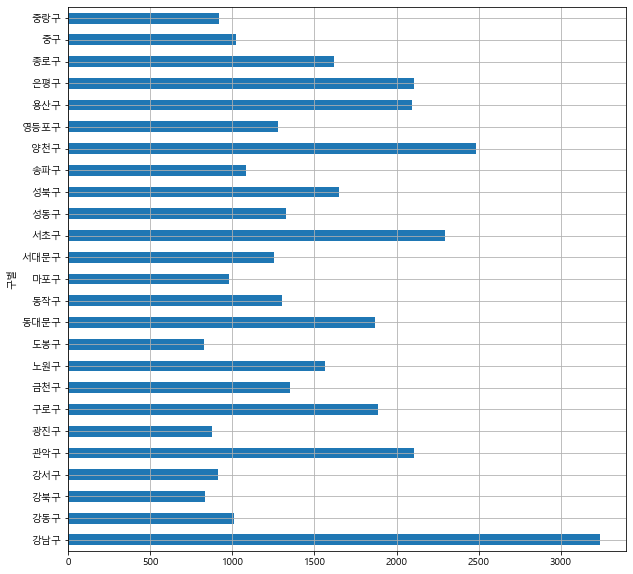

In [30]:
data_result["소계"].plot(kind="barh", grid=True, figsize=(10, 10));

- Pandas DataFrame은 데이터 변수에서 바로 plot() 명령을 사용할 수 있다
- 그리고 데이터(컬럼)가 많은 경우 정렬한 후 그리는 것이 효과적일 때가 많다

<AxesSubplot:title={'center':'가장 CCTV가 많은 구'}, ylabel='구별'>

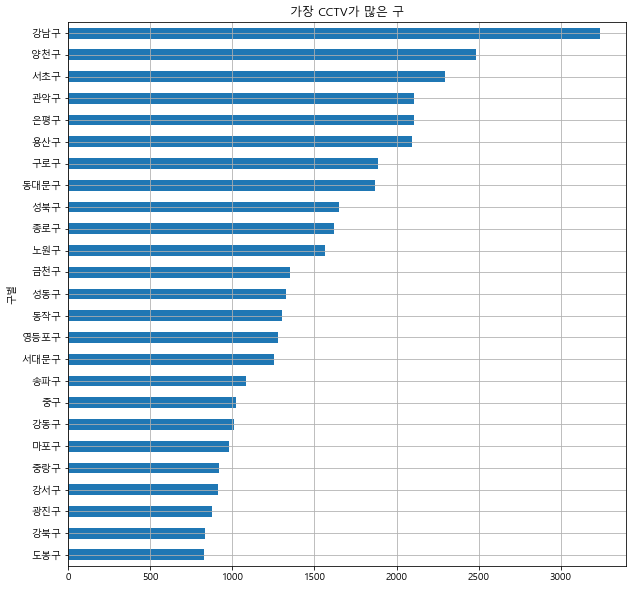

In [31]:
data_result["소계"].sort_values().plot(
    kind="barh", 
    grid=True,
    title="가장 CCTV가 많은 구",
    figsize=(10, 10)
    )

- 강남구가 CCTV수가 가장 많다

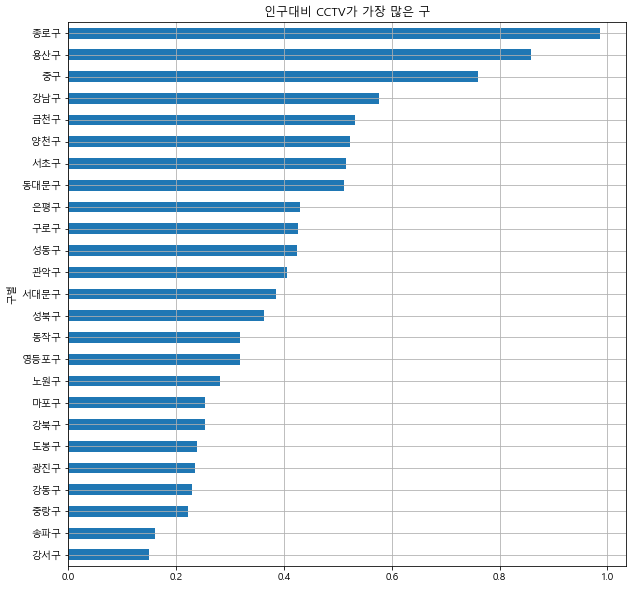

In [32]:
def drawGraph():

    data_result["CCTV비율"].sort_values().plot(
        kind="barh", 
        grid=True,
        title="인구대비 CCTV가 가장 많은 구",
        figsize=(10, 10)
        );

drawGraph()

- 종로구가 인구대비 CCTV수가 가장 많다

### 경향을 파악할 필요
- 단순 CCTV수와 인구대비 CCTV 비율을 볼 때
- CCTV 많은 구는 강남, 양천, 서초, 관악, 은평, 용산
- CCTV 비율이 높은 구는 종로, 용산, 중구가 1위 그룹
- 비율로 데이터를 보아도
- 전체 경향과 함께 보지 않으면 데이터를 제대로 이해시키기 어려울 듯하다

In [33]:
def drawGraph():
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result["인구수"], data_result["소계"],s=50)
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid()
    plt.show()

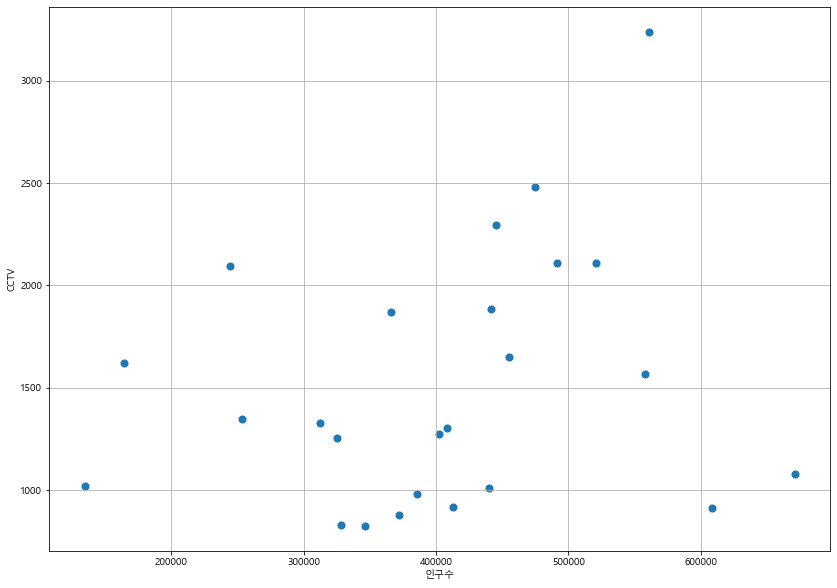

In [34]:
drawGraph()

- 인구수가 높아질수록 CCTV수가 높아지는게 보이긴 한다

## Linear Regression: 선형회귀
- Trend 파악(feat.Numpy)

### Numpy를 이용한 1차 직선 만들기
- numpy가 제공하는 간단한 함수를 이용해서 1차 직선을 만들어 그래프로 비교하자
- 절차
    - np.polyfit
        - 직선을 구성하기 위한 계수 계산
    - np.poly1d
        - polyfit으로 찾은 계수로 python에서 사용할 함수로 만들어 줌

In [35]:
import numpy as np

fp1 = np.polyfit(data_result["인구수"], data_result["소계"], 1) # np.polyfit(x축, y축, n차식)
fp1

array([1.11155868e-03, 1.06515745e+03])

In [36]:
f1 = np.poly1d(fp1) # polyfit에서 찾은 계수를 넣어서 함수 완성

In [37]:
f1(400000)

1509.7809252413333

- 서울시에서 인구수가 40만인 구가 있다면, 그 구는 서울시 25구의 CCTV 데이터 기준으로 봤을 때 CCTV개수는 대략 1500개쯤 나올 것이다. 

In [38]:
fx = np.linspace(100000, 700000, 100)

- 경향선을 그리기 위해 X 데이터 생성
- np.linspace(a, b, n): a부터 b까지 n개의 등간격 데이터 생성

In [39]:
def drawGraph():
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result["인구수"],data_result["소계"],s=50)
    plt.plot(fx, f1(fx), ls="--", lw=3, color="g")
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid()
    plt.show()

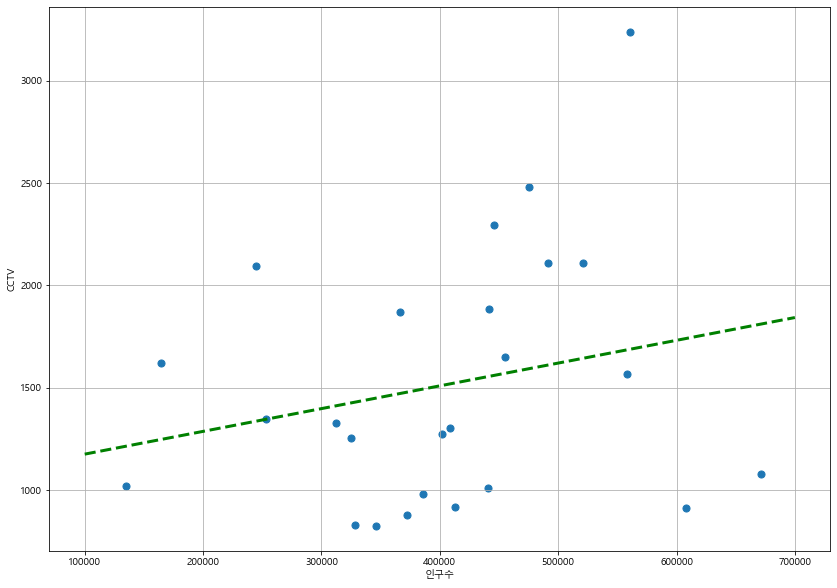

In [40]:
drawGraph()

- 25개 구위에 CCTV현황을 보니, 인구수가 50만정도 있다면 1600개 정도의 CCTV를 가져야 한다 
- 인구수 50~60만 사이에 있는 구중 경향에 비해 너무 많은 CCTV를 가지고 있는 구가 있다
- 인구수 60~70만 사세이 있는 2개의 구는 경향에 비해 너무 적은 CCTV를 가지고 있다

## 그래프 다듬기

### 경향과의 오차 만들기

data_result["오차"] = data_result["소계"] - f1(data_result["인구수"])
 - 경향(trend)과의 오차를 만들자
 - 경향은 f1 함수에 해당 인구를 입력: f1(data_result["인구수"])
 - 현재값: data_result["소계"]

In [41]:
fp1 = np.polyfit(data_result["인구수"], data_result["소계"], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result["오차"] = data_result["소계"] - f1(data_result["인구수"])

# 경향과 비교해서 데이터의 오차가 너무 나는 데이터를 계산
df_sort_f = data_result.sort_values(by="오차", ascending = False)
df_sort_t = data_result.sort_values(by="오차", ascending = True)

In [42]:
df_sort_f.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
양천구,2482,34.671731,475018,471154,3864,55234,0.813443,11.627770,0.522507,888.832166
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456,759.128697
서초구,2297,63.371266,445401,441102,4299,53205,0.965198,11.945415,0.515715,736.753199
은평구,2108,85.237258,491202,486794,4408,74559,0.897390,15.178888,0.429151,496.842700


- 경향 대비 CCTV를 많이 가진 구

In [43]:
df_sort_t.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061,-730.205628
도봉구,825,246.638655,346234,344166,2068,53488,0.597284,15.448512,0.238278,-625.016861
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910,-607.986645
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833,-600.988527


- 경향 대비 CCTV를 적게 가진 구

In [44]:
from matplotlib.colors import ListedColormap

# color map을 사용자 정의(user define)로 세팅
color_step = ["#e74c3c", "#2ecc71", "#95a5a6", "#2ecc71", "#3498db", "#3498db"]
my_cmap = ListedColormap(color_step)

In [45]:
def drawGraph():
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result["인구수"], data_result["소계"], c=data_result["오차"], s=50, cmap=my_cmap)
    plt.plot(fx, f1(fx), ls="--", lw=3, color="grey")
    
    for n in range(5):
        plt.text(
            df_sort_f["인구수"][n] * 1.02,
            df_sort_f["소계"][n] * 0.98,
            df_sort_f.index[n],
            fontsize=15,
        )
        
        plt.text(
            df_sort_t["인구수"][n] * 1.02,
            df_sort_t["소계"][n] * 0.98,
            df_sort_t.index[n],
            fontsize=15,
        )
    
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.colorbar()
    plt.grid()
    plt.show()

plt.scatter(data_result["인구수"], data_result["소계"], c=data_result["오차"], s=50, cmap=my_cmap)

- s: 마커의 크기
- c: color 세팅에 방금 계산한 경향과의 오차를 적용 
- cmap: 사용자 정의한 맵을 적용

for n in range(5):
        
        plt.text(df_sort_f["인구수"][n] * 1.02, df_sort_f["소계"][n] * 0.98, df_sort_f.index[n], fontsize=15)
        
        plt.text(df_sort_t["인구수"][n] * 1.02, df_sort_t["소계"][n] * 0.98, df_sort_t.index[n], fontsize=15)

- 오차가 큰 데이터 아래 위로 5개씩만 특별히 마커 옆에 구 이름을 명시
- text: 그래프에 글자를 그리는 명령
- plt.text(X, Y, Text, 설정)
- x, y 데이터에 1.02, 0.98을 곱한 이유는?
- 구 이름이 마커에 겹치지 않도록 살짝 거리를 두게 하는 의도

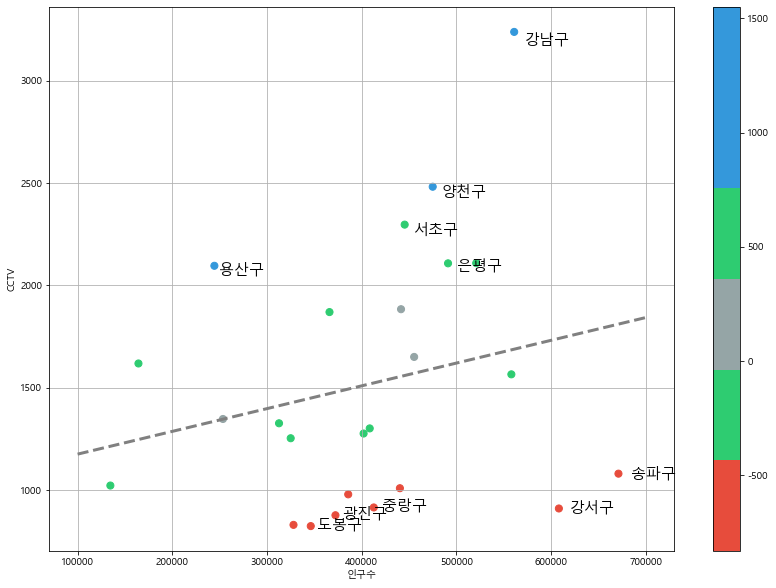

In [46]:
drawGraph()

---

## Pandas 기초
- Python에서 R 만큼의 강력한 데이터 핸들링 성능을 제공하는 모듈
- 단일 프로세스에서는 최대 효율
- 코딩 가능하고 응용 가능한 엑셀로 받아들여도 됨
- 누군가 스테로이드를 맞은 엑셀로 표현함

#### Series
- index와 value로 이루어져 있습니다.
- 한 가지 데이터 타입만 가질 수 있습니다.

In [47]:
import pandas as pd
import numpy as np

- pandas는 통상 pd
- numpy는 통상 np

In [48]:
pd.Series()

C:\Users\고선욱\AppData\Local\Temp/ipykernel_208308/2031691219.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series()


Series([], dtype: float64)

In [49]:
pd.Series([1, 2, 3, 4])

0    1
1    2
2    3
3    4
dtype: int64

In [50]:
pd.Series([1, 2, 3, 4], dtype=float64)

NameError: name 'float64' is not defined

In [51]:
pd.Series([1, 2, 3, 4], dtype=np.float64)

0    1.0
1    2.0
2    3.0
3    4.0
dtype: float64

In [52]:
pd.Series([1, 2, 3, 4], dtype=str)

0    1
1    2
2    3
3    4
dtype: object

In [53]:
pd.Series(np.array([1, 2, 3]))

0    1
1    2
2    3
dtype: int32

In [54]:
pd.Series({"Key": "Value"})

Key    Value
dtype: object

In [55]:
data = pd.Series([1, 2, 3, 4, "5"])
data

0    1
1    2
2    3
3    4
4    5
dtype: object

In [56]:
# 짝수를 찾고 싶다
data % 2

TypeError: not all arguments converted during string formatting

In [57]:
data = pd.Series([1, 2, 3, 4])
data

0    1
1    2
2    3
3    4
dtype: int64

In [58]:
data % 2

0    1
1    0
2    1
3    0
dtype: int64

#### 날짜 데이터

In [59]:
dates = pd.date_range("20210101", periods=6)
dates

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

### DataFrame 
- pd.Series()
    - index, value
- pd.DataFrame()
    - index, value, column

In [60]:
# 표준정규분포에서 샘플링한 난수 생성
data = np.random.randn(6, 4) # 날짜 데이터의 인덱스를 6으로 설정하였기 때문에 난수 생성도 6행으로 1대1 대응을 만족시켜야 함!
data

array([[ 0.36025645,  1.89364415, -0.50728509,  0.874023  ],
       [ 0.74110983, -2.73085907, -0.15633203, -1.60061716],
       [ 0.12387862,  0.34654777,  0.85558512,  0.705434  ],
       [ 0.49978219, -0.41339586,  0.52557155, -0.63893872],
       [ 1.06480844, -0.48175692,  0.14699756,  0.4517951 ],
       [-0.22416467,  0.9844288 ,  0.13042971,  0.40567729]])

In [61]:
df = pd.DataFrame(data, index=dates, columns=["A", "B", "C", "D"])
df

,A,B,C,D
2021-01-01,0.360256,1.893644,-0.507285,0.874023
2021-01-02,0.741110,-2.730859,-0.156332,-1.600617
2021-01-03,0.123879,0.346548,0.855585,0.705434
2021-01-04,0.499782,-0.413396,0.525572,-0.638939
2021-01-05,1.064808,-0.481757,0.146998,0.451795
2021-01-06,-0.224165,0.984429,0.130430,0.405677


#### 데이터 프레임 정보 탐색

- df.head()

In [62]:
df.head()

,A,B,C,D
2021-01-01,0.360256,1.893644,-0.507285,0.874023
2021-01-02,0.741110,-2.730859,-0.156332,-1.600617
2021-01-03,0.123879,0.346548,0.855585,0.705434
2021-01-04,0.499782,-0.413396,0.525572,-0.638939
2021-01-05,1.064808,-0.481757,0.146998,0.451795


- df.tail()

In [63]:
df.tail()

,A,B,C,D
2021-01-02,0.741110,-2.730859,-0.156332,-1.600617
2021-01-03,0.123879,0.346548,0.855585,0.705434
2021-01-04,0.499782,-0.413396,0.525572,-0.638939
2021-01-05,1.064808,-0.481757,0.146998,0.451795
2021-01-06,-0.224165,0.984429,0.130430,0.405677


- df.index

In [64]:
df.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [65]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [66]:
df.values

array([[ 0.36025645,  1.89364415, -0.50728509,  0.874023  ],
       [ 0.74110983, -2.73085907, -0.15633203, -1.60061716],
       [ 0.12387862,  0.34654777,  0.85558512,  0.705434  ],
       [ 0.49978219, -0.41339586,  0.52557155, -0.63893872],
       [ 1.06480844, -0.48175692,  0.14699756,  0.4517951 ],
       [-0.22416467,  0.9844288 ,  0.13042971,  0.40567729]])

- df.info(): 데이터 프레임의 기본 정보 확인

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2021-01-01 to 2021-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


- df.describe(): 데이터 프레임의 기술통계 정보 확인

In [68]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.427612,-0.066899,0.165828,0.032896
std,0.454117,1.581696,0.482422,0.958538
min,-0.224165,-2.730859,-0.507285,-1.600617
25%,0.182973,-0.464667,-0.084642,-0.377785
50%,0.430019,-0.033424,0.138714,0.428736
75%,0.680778,0.824959,0.430928,0.642024
max,1.064808,1.893644,0.855585,0.874023


### 데이터 정렬
- sort_values()
- 특정 컬럼(열)을 기준으로 데이터를 정렬합니다.

In [69]:
df

,A,B,C,D
2021-01-01,0.360256,1.893644,-0.507285,0.874023
2021-01-02,0.741110,-2.730859,-0.156332,-1.600617
2021-01-03,0.123879,0.346548,0.855585,0.705434
2021-01-04,0.499782,-0.413396,0.525572,-0.638939
2021-01-05,1.064808,-0.481757,0.146998,0.451795
2021-01-06,-0.224165,0.984429,0.130430,0.405677


In [70]:
df.sort_values(by="B", ascending=False, inplace=True ) #inplace=True를 설정해줘야 데이터 프레임이 변경된다.

In [71]:
df

,A,B,C,D
2021-01-01,0.360256,1.893644,-0.507285,0.874023
2021-01-06,-0.224165,0.984429,0.130430,0.405677
2021-01-03,0.123879,0.346548,0.855585,0.705434
2021-01-04,0.499782,-0.413396,0.525572,-0.638939
2021-01-05,1.064808,-0.481757,0.146998,0.451795
2021-01-02,0.741110,-2.730859,-0.156332,-1.600617


In [72]:
# 한 개 컬럼 선택
df["A"]

2021-01-01    0.360256
2021-01-06   -0.224165
2021-01-03    0.123879
2021-01-04    0.499782
2021-01-05    1.064808
2021-01-02    0.741110
Name: A, dtype: float64

In [73]:
type(df["A"])

pandas.core.series.Series

In [74]:
df.A

2021-01-01    0.360256
2021-01-06   -0.224165
2021-01-03    0.123879
2021-01-04    0.499782
2021-01-05    1.064808
2021-01-02    0.741110
Name: A, dtype: float64

In [75]:
df = pd.DataFrame(data, index=dates, columns=["A", "B", "C", "D"])
df

,A,B,C,D
2021-01-01,0.360256,1.893644,-0.507285,0.874023
2021-01-02,0.741110,-2.730859,-0.156332,-1.600617
2021-01-03,0.123879,0.346548,0.855585,0.705434
2021-01-04,0.499782,-0.413396,0.525572,-0.638939
2021-01-05,1.064808,-0.481757,0.146998,0.451795
2021-01-06,-0.224165,0.984429,0.130430,0.405677


In [76]:
df.D

2021-01-01    0.874023
2021-01-02   -1.600617
2021-01-03    0.705434
2021-01-04   -0.638939
2021-01-05    0.451795
2021-01-06    0.405677
Freq: D, Name: D, dtype: float64

In [77]:
# 두 개 이상 컬럼 선택
df[["A", "B"]]

,A,B
2021-01-01,0.360256,1.893644
2021-01-02,0.741110,-2.730859
2021-01-03,0.123879,0.346548
2021-01-04,0.499782,-0.413396
2021-01-05,1.064808,-0.481757
2021-01-06,-0.224165,0.984429


### offset index
- [n:m] : n부터 m-1까지
- 인덱스나 컬럼의 이름으로 slice 하는 경우는 끝을 포함한다

In [78]:
df

,A,B,C,D
2021-01-01,0.360256,1.893644,-0.507285,0.874023
2021-01-02,0.741110,-2.730859,-0.156332,-1.600617
2021-01-03,0.123879,0.346548,0.855585,0.705434
2021-01-04,0.499782,-0.413396,0.525572,-0.638939
2021-01-05,1.064808,-0.481757,0.146998,0.451795
2021-01-06,-0.224165,0.984429,0.130430,0.405677


In [79]:
df[0:3]

,A,B,C,D
2021-01-01,0.360256,1.893644,-0.507285,0.874023
2021-01-02,0.741110,-2.730859,-0.156332,-1.600617
2021-01-03,0.123879,0.346548,0.855585,0.705434


In [80]:
df["20210101":'20210104']

,A,B,C,D
2021-01-01,0.360256,1.893644,-0.507285,0.874023
2021-01-02,0.741110,-2.730859,-0.156332,-1.600617
2021-01-03,0.123879,0.346548,0.855585,0.705434
2021-01-04,0.499782,-0.413396,0.525572,-0.638939


- loc : location
- index 이름으로 특정 행,열을 선택한다    

In [81]:
df

,A,B,C,D
2021-01-01,0.360256,1.893644,-0.507285,0.874023
2021-01-02,0.741110,-2.730859,-0.156332,-1.600617
2021-01-03,0.123879,0.346548,0.855585,0.705434
2021-01-04,0.499782,-0.413396,0.525572,-0.638939
2021-01-05,1.064808,-0.481757,0.146998,0.451795
2021-01-06,-0.224165,0.984429,0.130430,0.405677


In [82]:
df.loc[:,["A", "B"]]

,A,B
2021-01-01,0.360256,1.893644
2021-01-02,0.741110,-2.730859
2021-01-03,0.123879,0.346548
2021-01-04,0.499782,-0.413396
2021-01-05,1.064808,-0.481757
2021-01-06,-0.224165,0.984429


In [83]:
df.loc["20210102":"20210104",["A", "D"]]

,A,D
2021-01-02,0.741110,-1.600617
2021-01-03,0.123879,0.705434
2021-01-04,0.499782,-0.638939


In [84]:
df.loc["20210102":"20210104", "A":"D"]

,A,B,C,D
2021-01-02,0.741110,-2.730859,-0.156332,-1.600617
2021-01-03,0.123879,0.346548,0.855585,0.705434
2021-01-04,0.499782,-0.413396,0.525572,-0.638939


In [85]:
df.loc["20210102", ["A", "B"]]

A    0.741110
B   -2.730859
Name: 2021-01-02 00:00:00, dtype: float64

- iloc : integer location
    - 컴퓨터가 인식하는 인덱스 값으로 선택

In [86]:
df

,A,B,C,D
2021-01-01,0.360256,1.893644,-0.507285,0.874023
2021-01-02,0.741110,-2.730859,-0.156332,-1.600617
2021-01-03,0.123879,0.346548,0.855585,0.705434
2021-01-04,0.499782,-0.413396,0.525572,-0.638939
2021-01-05,1.064808,-0.481757,0.146998,0.451795
2021-01-06,-0.224165,0.984429,0.130430,0.405677


In [87]:
df.iloc[3]

A    0.499782
B   -0.413396
C    0.525572
D   -0.638939
Name: 2021-01-04 00:00:00, dtype: float64

In [88]:
df.iloc[3, 2]

0.5255715522599009

In [89]:
df.iloc[3:5, 0:2]

,A,B
2021-01-04,0.499782,-0.413396
2021-01-05,1.064808,-0.481757


In [90]:
df.iloc[[1, 2, 4],[0, 2]]

,A,C
2021-01-02,0.741110,-0.156332
2021-01-03,0.123879,0.855585
2021-01-05,1.064808,0.146998


In [91]:
df.iloc[:, 1:3]

,B,C
2021-01-01,1.893644,-0.507285
2021-01-02,-2.730859,-0.156332
2021-01-03,0.346548,0.855585
2021-01-04,-0.413396,0.525572
2021-01-05,-0.481757,0.146998
2021-01-06,0.984429,0.130430


### condition

In [92]:
df

,A,B,C,D
2021-01-01,0.360256,1.893644,-0.507285,0.874023
2021-01-02,0.741110,-2.730859,-0.156332,-1.600617
2021-01-03,0.123879,0.346548,0.855585,0.705434
2021-01-04,0.499782,-0.413396,0.525572,-0.638939
2021-01-05,1.064808,-0.481757,0.146998,0.451795
2021-01-06,-0.224165,0.984429,0.130430,0.405677


In [93]:
# A 컬럼에서 0보다 큰 숫자(양수)만 선택
df["A"] > 0

2021-01-01     True
2021-01-02     True
2021-01-03     True
2021-01-04     True
2021-01-05     True
2021-01-06    False
Freq: D, Name: A, dtype: bool

In [94]:
df

,A,B,C,D
2021-01-01,0.360256,1.893644,-0.507285,0.874023
2021-01-02,0.741110,-2.730859,-0.156332,-1.600617
2021-01-03,0.123879,0.346548,0.855585,0.705434
2021-01-04,0.499782,-0.413396,0.525572,-0.638939
2021-01-05,1.064808,-0.481757,0.146998,0.451795
2021-01-06,-0.224165,0.984429,0.130430,0.405677


In [95]:
df[df["A"] > 0]

,A,B,C,D
2021-01-01,0.360256,1.893644,-0.507285,0.874023
2021-01-02,0.741110,-2.730859,-0.156332,-1.600617
2021-01-03,0.123879,0.346548,0.855585,0.705434
2021-01-04,0.499782,-0.413396,0.525572,-0.638939
2021-01-05,1.064808,-0.481757,0.146998,0.451795


In [96]:
df[df > 0]

,A,B,C,D
2021-01-01,0.360256,1.893644,NaN,0.874023
2021-01-02,0.741110,NaN,NaN,NaN
2021-01-03,0.123879,0.346548,0.855585,0.705434
2021-01-04,0.499782,NaN,0.525572,NaN
2021-01-05,1.064808,NaN,0.146998,0.451795
2021-01-06,NaN,0.984429,0.130430,0.405677


- Nan : Not a Number

### 컬럼 추가
- 기존 컬럼이 없으면 추가
- 기존 컬럼이 있으면 수정

In [97]:
df

,A,B,C,D
2021-01-01,0.360256,1.893644,-0.507285,0.874023
2021-01-02,0.741110,-2.730859,-0.156332,-1.600617
2021-01-03,0.123879,0.346548,0.855585,0.705434
2021-01-04,0.499782,-0.413396,0.525572,-0.638939
2021-01-05,1.064808,-0.481757,0.146998,0.451795
2021-01-06,-0.224165,0.984429,0.130430,0.405677


In [98]:
df["E"] = ["one", "one", "two", "three", "four", "six"]
df

,A,B,C,D,E
2021-01-01,0.360256,1.893644,-0.507285,0.874023,one
2021-01-02,0.741110,-2.730859,-0.156332,-1.600617,one
2021-01-03,0.123879,0.346548,0.855585,0.705434,two
2021-01-04,0.499782,-0.413396,0.525572,-0.638939,three
2021-01-05,1.064808,-0.481757,0.146998,0.451795,four
2021-01-06,-0.224165,0.984429,0.130430,0.405677,six


- isin()
- 특정 요소가 있는지 확인

In [99]:
df["E"].isin(["two", "five"])

2021-01-01    False
2021-01-02    False
2021-01-03     True
2021-01-04    False
2021-01-05    False
2021-01-06    False
Freq: D, Name: E, dtype: bool

In [100]:
df["E"].isin(["two", "five", "three"])

2021-01-01    False
2021-01-02    False
2021-01-03     True
2021-01-04     True
2021-01-05    False
2021-01-06    False
Freq: D, Name: E, dtype: bool

In [101]:
df[df["E"].isin(["two", "five", "three"])]

,A,B,C,D,E
2021-01-03,0.123879,0.346548,0.855585,0.705434,two
2021-01-04,0.499782,-0.413396,0.525572,-0.638939,three


### 특정 컬럼 제거
- del
- drop

In [102]:
del df["E"]
df

,A,B,C,D
2021-01-01,0.360256,1.893644,-0.507285,0.874023
2021-01-02,0.741110,-2.730859,-0.156332,-1.600617
2021-01-03,0.123879,0.346548,0.855585,0.705434
2021-01-04,0.499782,-0.413396,0.525572,-0.638939
2021-01-05,1.064808,-0.481757,0.146998,0.451795
2021-01-06,-0.224165,0.984429,0.130430,0.405677


In [103]:
df.drop(["D"], axis=1) # axis=0은 가로, axis=1은 세로

,A,B,C
2021-01-01,0.360256,1.893644,-0.507285
2021-01-02,0.741110,-2.730859,-0.156332
2021-01-03,0.123879,0.346548,0.855585
2021-01-04,0.499782,-0.413396,0.525572
2021-01-05,1.064808,-0.481757,0.146998
2021-01-06,-0.224165,0.984429,0.130430


In [104]:
df.drop(["20210104"])

,A,B,C,D
2021-01-01,0.360256,1.893644,-0.507285,0.874023
2021-01-02,0.741110,-2.730859,-0.156332,-1.600617
2021-01-03,0.123879,0.346548,0.855585,0.705434
2021-01-05,1.064808,-0.481757,0.146998,0.451795
2021-01-06,-0.224165,0.984429,0.130430,0.405677


### apply()

In [105]:
df

,A,B,C,D
2021-01-01,0.360256,1.893644,-0.507285,0.874023
2021-01-02,0.741110,-2.730859,-0.156332,-1.600617
2021-01-03,0.123879,0.346548,0.855585,0.705434
2021-01-04,0.499782,-0.413396,0.525572,-0.638939
2021-01-05,1.064808,-0.481757,0.146998,0.451795
2021-01-06,-0.224165,0.984429,0.130430,0.405677


In [106]:
df["A"].apply("sum")

2.5656708595132414

In [107]:
df["A"].apply("mean")

0.42761180991887354

In [108]:
df["A"].apply("min"), df["A"].apply("max")

(-0.2241646732540358, 1.064808438796696)

In [109]:
df[["A", "D"]].apply("sum")

A    2.565671
D    0.197374
dtype: float64

In [110]:
df["A"].apply(np.sum)

2021-01-01    0.360256
2021-01-02    0.741110
2021-01-03    0.123879
2021-01-04    0.499782
2021-01-05    1.064808
2021-01-06   -0.224165
Freq: D, Name: A, dtype: float64

In [111]:
df["A"].apply(np.mean)

2021-01-01    0.360256
2021-01-02    0.741110
2021-01-03    0.123879
2021-01-04    0.499782
2021-01-05    1.064808
2021-01-06   -0.224165
Freq: D, Name: A, dtype: float64

In [112]:
 df["A"].apply(np.std)

2021-01-01    0.0
2021-01-02    0.0
2021-01-03    0.0
2021-01-04    0.0
2021-01-05    0.0
2021-01-06    0.0
Freq: D, Name: A, dtype: float64

In [113]:
df.apply(np.sum)

A    2.565671
B   -0.401391
C    0.994967
D    0.197374
dtype: float64

In [114]:
df

,A,B,C,D
2021-01-01,0.360256,1.893644,-0.507285,0.874023
2021-01-02,0.741110,-2.730859,-0.156332,-1.600617
2021-01-03,0.123879,0.346548,0.855585,0.705434
2021-01-04,0.499782,-0.413396,0.525572,-0.638939
2021-01-05,1.064808,-0.481757,0.146998,0.451795
2021-01-06,-0.224165,0.984429,0.130430,0.405677


In [115]:
def plusminus(num):
    return "plus" if num > 0 else "minus"

In [116]:
df["A"].apply(plusminus)

2021-01-01     plus
2021-01-02     plus
2021-01-03     plus
2021-01-04     plus
2021-01-05     plus
2021-01-06    minus
Freq: D, Name: A, dtype: object

In [117]:
df["A"].apply(lambda num: "plus" if num > 0 else "minus")

2021-01-01     plus
2021-01-02     plus
2021-01-03     plus
2021-01-04     plus
2021-01-05     plus
2021-01-06    minus
Freq: D, Name: A, dtype: object

---

## 2. CCTV 데이터 훑어보기

In [118]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


In [119]:
CCTV_Seoul.tail()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
20,용산구,2096,1368,218,112,398,53.216374
21,은평구,2108,1138,224,278,468,85.237258
22,종로구,1619,464,314,211,630,248.922414
23,중구,1023,413,190,72,348,147.699758
24,중랑구,916,509,121,177,109,79.960707


In [120]:
CCTV_Seoul.sort_values(by="소계",ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
9,도봉구,825,238,159,42,386,246.638655
2,강북구,831,369,120,138,204,125.203252
5,광진구,878,573,78,53,174,53.228621
3,강서구,911,388,258,184,81,134.793814
24,중랑구,916,509,121,177,109,79.960707


In [121]:
CCTV_Seoul.sort_values(by="소계",ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
18,양천구,2482,1843,142,30,467,34.671731
14,서초구,2297,1406,157,336,398,63.371266
4,관악구,2109,846,260,390,613,149.290780
21,은평구,2108,1138,224,278,468,85.237258


In [122]:
# 기존 컬럼이 없으면 추가, 있으면 수정!
CCTV_Seoul["최근증가율"] = (
    (CCTV_Seoul["2014년"] + CCTV_Seoul["2015년"] + CCTV_Seoul["2016년"]) / 
     CCTV_Seoul["2013년도 이전"] * 100
)

CCTV_Seoul.sort_values(by="최근증가율",ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


## 3. 인구현황 데이터 훑어보기

In [123]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118
4,성동구,312711,304808,7903,41273,2.527254,13.198448
5,광진구,372298,357703,14595,43953,3.920247,11.805865


In [124]:
pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
21,관악구,520929,503297,17632,70046,3.384722,13.446362
22,서초구,445401,441102,4299,53205,0.965198,11.945415
23,강남구,561052,556164,4888,65060,0.871220,11.596073
24,송파구,671173,664496,6677,76582,0.994825,11.410173
25,강동구,440359,436223,4136,56161,0.939234,12.753458


In [125]:
pop_Seoul.drop([0],inplace=True)
pop_Seoul.head()

KeyError: '[0] not found in axis'

In [126]:
pop_Seoul["구별"].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [127]:
len(pop_Seoul["구별"].unique())

25

In [128]:
# 외국인비율, 고령자비율
pop_Seoul["외국인비율"] = pop_Seoul["외국인"] / pop_Seoul["인구수"] * 100
pop_Seoul["고령자비율"] = pop_Seoul["고령자"] / pop_Seoul["인구수"] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118
4,성동구,312711,304808,7903,41273,2.527254,13.198448
5,광진구,372298,357703,14595,43953,3.920247,11.805865


In [129]:
pop_Seoul.sort_values(by="인구수",ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
23,강남구,561052,556164,4888,65060,0.871220,11.596073
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


In [130]:
pop_Seoul.sort_values(by="외국인",ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402024,368550,33474,53981,8.326369,13.427308
17,구로구,441559,410742,30817,58794,6.979135,13.315095
18,금천구,253491,235154,18337,34170,7.233787,13.479769
21,관악구,520929,503297,17632,70046,3.384722,13.446362
6,동대문구,366011,350647,15364,55718,4.197688,15.223040


In [131]:
pop_Seoul.sort_values(by="외국인비율",ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402024,368550,33474,53981,8.326369,13.427308
18,금천구,253491,235154,18337,34170,7.233787,13.479769
17,구로구,441559,410742,30817,58794,6.979135,13.315095
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118


In [132]:
pop_Seoul.sort_values(by="고령자",ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
12,은평구,491202,486794,4408,74559,0.897390,15.178888
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


In [133]:
pop_Seoul.sort_values(by="고령자비율",ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,328002,324479,3523,56530,1.074079,17.234651
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
10,도봉구,346234,344166,2068,53488,0.597284,15.448512
6,동대문구,366011,350647,15364,55718,4.197688,15.223040


## 4. 두 데이터 합치기

---

#### Pandas에서 데이터 프레임을 병합하는 방법
- pd.concat()
- pd.merge()
- pd.join()

In [134]:
pd.merge(left, right)

NameError: name 'left' is not defined

In [135]:
# 딕셔너리 안의 리스트 형태

left = pd.DataFrame(
    {
        "key": ["K0", "K4", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [136]:
# 리스트 안의 딕셔너리 형태

right = pd.DataFrame([
    {"key":"K0", "C":"C0", "D":"D0"},
    {"key":"K1", "C":"C1", "D":"D1"},
    {"key":"K2", "C":"C2", "D":"D2"},
    {"key":"K3", "C":"C3", "D":"D3"},
])
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


#### pd.merge()
- 두 데이터 프레임에서 컬럼이나 인덱스를 기준으로 잡고 병합하는 방법
- 기준이 되는 컬럼이나 인덱스를 키값이라고 한다
- 기준이 되는 키값은 두 데이터 프레임에 모두 포함되어 있어야한다.

In [137]:
pd.merge(left, right, on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [138]:
pd.merge(left, right, how="inner", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [139]:
pd.merge(left, right, how="left", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [140]:
pd.merge(left, right, how="right", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [141]:
pd.merge(left, right, how="outer", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


---

In [142]:
CCTV_Seoul.head(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195


In [143]:
pop_Seoul.head(1)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656


In [144]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on="구별")
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,379,99,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,369,120,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,388,258,184,81,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,846,260,390,613,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 년도별 데이터 컬럼 삭제
- del
- drop()

In [145]:
del data_result["2013년도 이전"]
del data_result["2014년"]
data_result.head(3)

,구별,소계,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651


In [146]:
data_result.drop(["2015년", "2016년"], axis=1, inplace=True)
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 인덱스 변경
- set_index()
- 선택한 컬럼을 데이터 프레임의 인덱스로 지정

In [147]:
data_result.set_index("구별", inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 상관계수
- corr()
- correlation 약자
- 상관계수가 0.2 이상인 데이터를 비교

In [148]:
data_result.corr()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,-0.264378,0.232555,0.227852,0.030421,0.163905,-0.045956,-0.267841
최근증가율,-0.264378,1.000000,-0.097165,-0.086341,-0.156421,-0.072251,-0.047102,0.190396
인구수,0.232555,-0.097165,1.000000,0.998151,-0.167243,0.936737,-0.601076,-0.637414
한국인,0.227852,-0.086341,0.998151,1.000000,-0.226853,0.936155,-0.645463,-0.628360
외국인,0.030421,-0.156421,-0.167243,-0.226853,1.000000,-0.175318,0.838612,-0.021147
고령자,0.163905,-0.072251,0.936737,0.936155,-0.175318,1.000000,-0.620300,-0.348840
외국인비율,-0.045956,-0.047102,-0.601076,-0.645463,0.838612,-0.620300,1.000000,0.242816
고령자비율,-0.267841,0.190396,-0.637414,-0.628360,-0.021147,-0.348840,0.242816,1.000000


In [149]:
# object 데이터 타입이 없었기 때문에 모두 연산 가능!
data_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   소계      25 non-null     int64  
 1   최근증가율   25 non-null     float64
 2   인구수     25 non-null     int64  
 3   한국인     25 non-null     int64  
 4   외국인     25 non-null     int64  
 5   고령자     25 non-null     int64  
 6   외국인비율   25 non-null     float64
 7   고령자비율   25 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 1.8+ KB


In [150]:
data_result["CCTV비율"] = data_result["소계"] / data_result["인구수"] * 100
data_result.sort_values(by="CCTV비율",ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
종로구,1619,248.922414,164257,154770,9487,26182,5.775705,15.939656,0.985651
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456
중구,1023,147.699758,134593,125709,8884,21384,6.600640,15.887899,0.760069
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
금천구,1348,100.000000,253491,235154,18337,34170,7.233787,13.479769,0.531774


In [151]:
data_result["CCTV비율"] = data_result["소계"] / data_result["인구수"] * 100
data_result.sort_values(by="CCTV비율",ascending=True).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833


---

# matplotlib 기초

In [152]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc("font", family="Malgun Gothic") # 한국어 폰트 지정
# %matplotlib inline
get_ipython().run_line_magic("matplotlib", "inline")

matplotlib 그래프 기본 형태


```
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.show
```

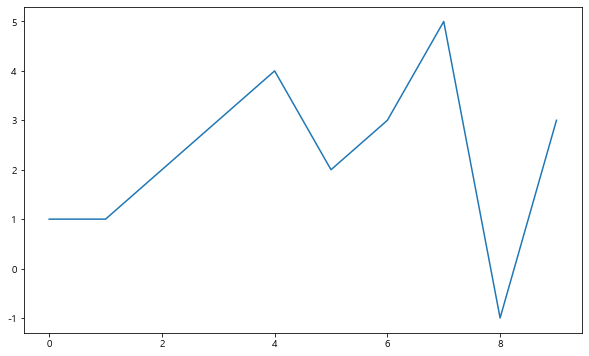

In [153]:
plt.figure(figsize=(10, 6))
plt.plot([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 1, 2, 3, 4, 2, 3, 5, -1, 3])
plt.show()

### 예제1: 그래프 기초

#### 삼각함수 그리기
- np.arange(a, b, s): a부터 b까지 s의 간격
- np.sin(value)    

In [154]:
import numpy as np

t = np.arange(0, 12, 0.01)
y = np.sin(t)

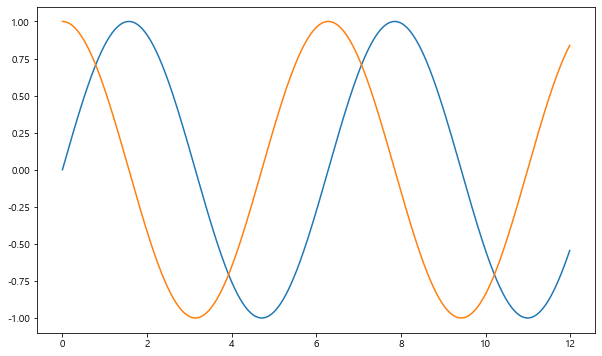

In [155]:
plt.figure(figsize=(10, 6))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.show()

- 1. 격자무늬 추가
- 2. 그래프 제목 추가
- 3. x축, y축, 제목 추가
- 4. 주황색, 파란색 선 데이터 의미 구분

In [156]:
def drawGraph():
    
    plt.figure(figsize=(10, 6))
    plt.plot(t, np.sin(t), label="sin") 
    plt.plot(t, np.cos(t), label="cos")
    plt.grid(True)
    plt.legend(loc=3) # 범례, default는 빈공간에
    plt.title("Example of sinewave")
    plt.xlabel("time")
    plt.ylabel("Amplitude") # 진폭
    plt.show()

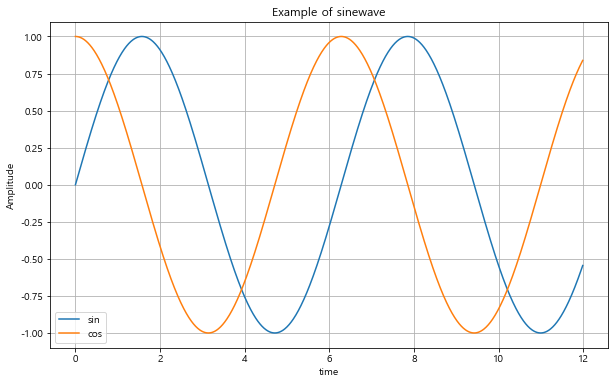

In [157]:
drawGraph()

### 예제2: 그래프 커스텀

In [158]:
t = np.arange(0, 5, 0.5)
t

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

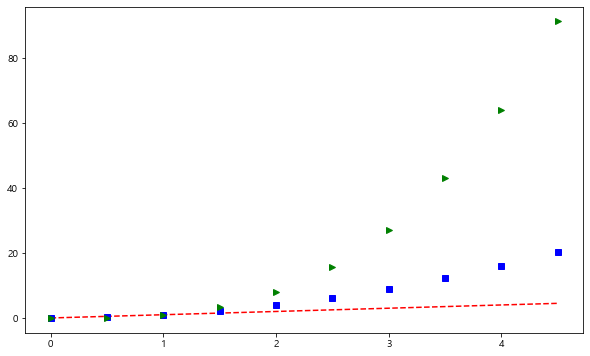

In [159]:
plt.figure(figsize=(10, 6))
plt.plot(t, t, "r--")
plt.plot(t, t ** 2, "bs")
plt.plot(t, t ** 3, "g>")
plt.show()

In [160]:
# t = [0, 1, 2, 3, 4, 5, 6]
t = list(range(0, 7))
y = [1, 4, 5, 8, 9, 5, 3]

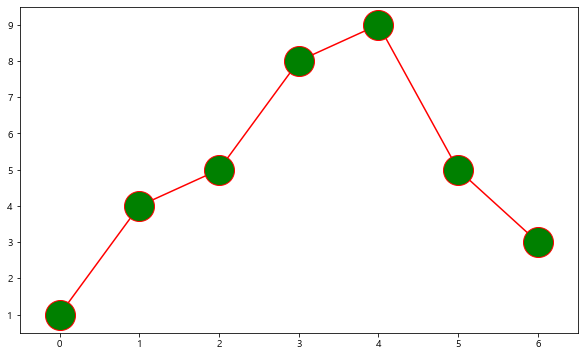

In [161]:
def drawGraph():

    plt.figure(figsize=(10, 6))
    plt.plot(
        t,
        y,
        color="red",
        linestyle="-", # '-'는 실선, '--'는 점선
        marker="o",
        markerfacecolor="green",
        markersize=30,
    )

    plt.xlim([-0.5, 6.5])
    plt.ylim([0.5, 9.5])
    plt.show()
    
drawGraph()    

### 예제3: scatter plot

In [162]:
t = np.array(range(0, 10))
y = np.array([9, 8, 7, 9, 8, 3, 2, 4, 3, 4])

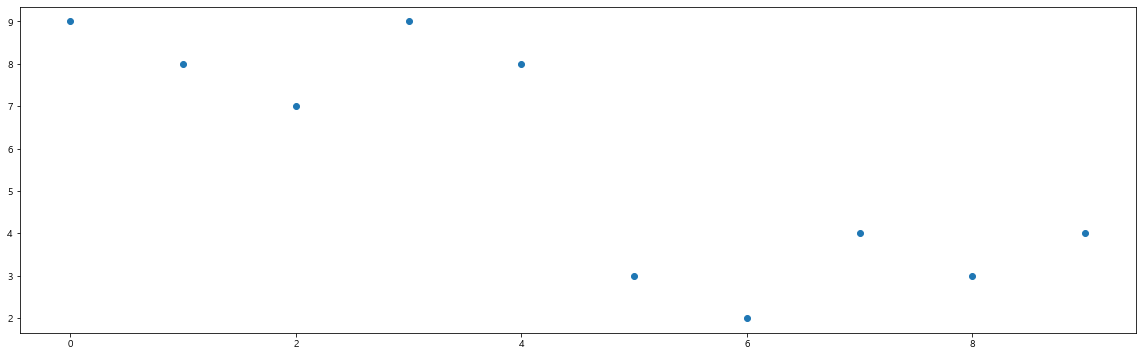

In [163]:
def drawGraph():

    plt.figure(figsize=(20, 6))
    plt.scatter(t, y)
    plt.show()

drawGraph()

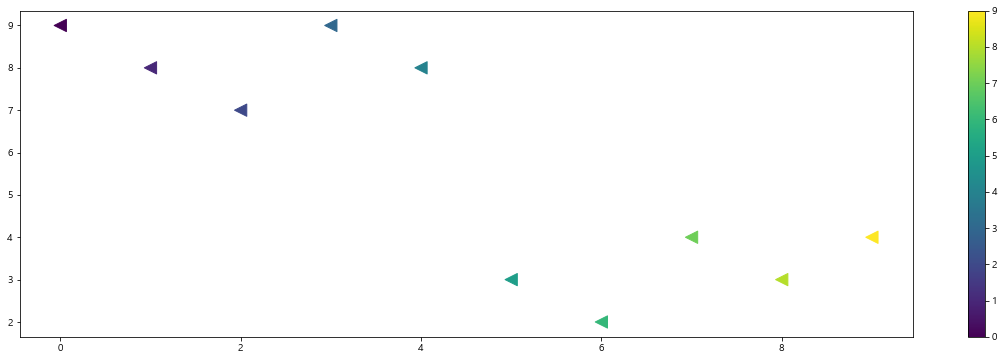

In [164]:
colormap = t

def drawGraph():

    plt.figure(figsize=(20, 6))
    plt.scatter(t, y, s=150, c=colormap, marker="<")
    plt.colorbar()
    plt.show()

drawGraph()

### 예제4: Pandas에서 plot 그리기
- matplotlib을 가져와서 사용한다

In [165]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


<AxesSubplot:xlabel='구별'>

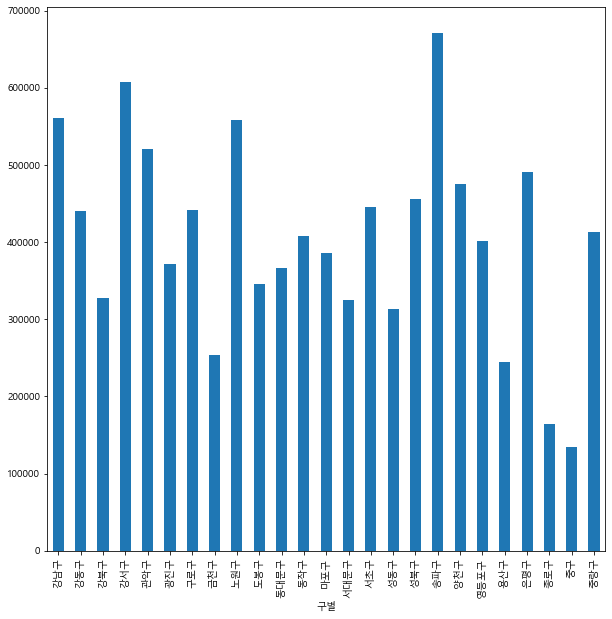

In [166]:
data_result["인구수"].plot(kind="bar", figsize=(10, 10))

<AxesSubplot:ylabel='구별'>

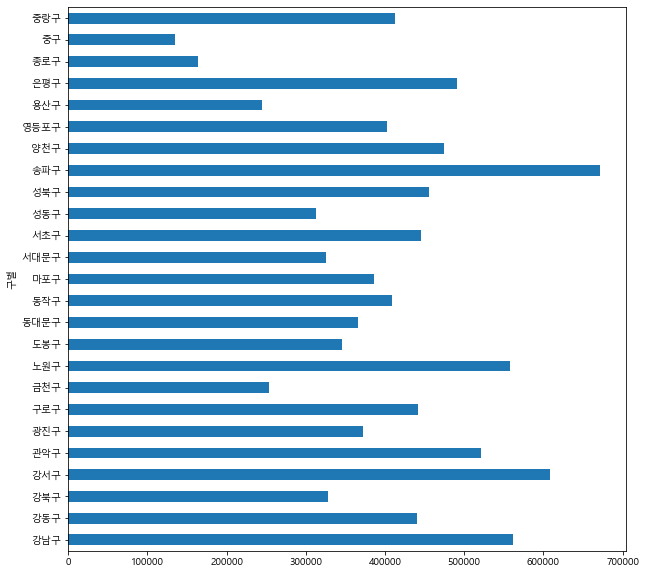

In [167]:
data_result["인구수"].plot(kind="barh", figsize=(10, 10))

---

## 5. 데이터 시각화

In [168]:
import matplotlib.pyplot as plt
# import matplotlib as mpl
from matplotlib import rc

plt.rcParams["axes.unicode_minus"] = False # 마이너스 부호 때문에 한글이 깨질 수가 있어 주는 설정
rc("font", family="Malgun Gothic")
# %matplotlib inline
get_ipython().run_line_magic("matplotlib", "inline")

In [169]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


#### 소계 컬럼 시각화

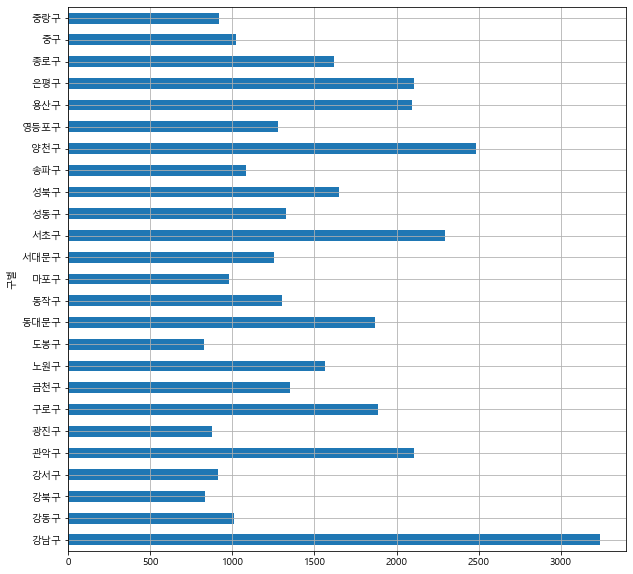

In [170]:
data_result["소계"].plot(kind="barh", grid=True, figsize=(10, 10)); #세미콜론은 바로실행

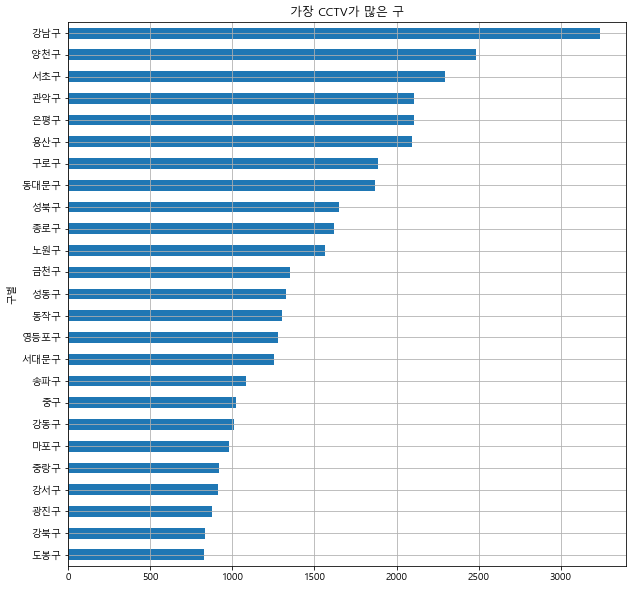

In [171]:
def drawGraph():
    data_result["소계"].sort_values().plot(
        kind="barh", grid=True, title="가장 CCTV가 많은 구", figsize=(10, 10)); #세미콜론은 바로실행
drawGraph()

In [172]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


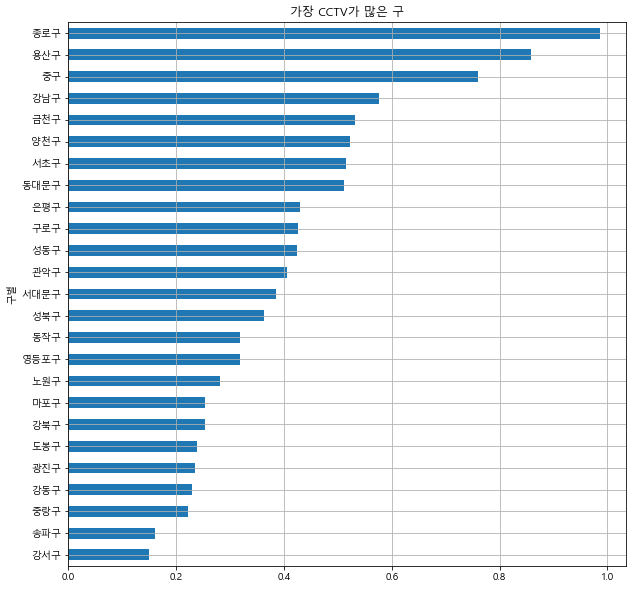

In [217]:
def drawGraph():
    data_result["CCTV비율"].sort_values().plot(
        kind="barh", grid=True, title="가장 CCTV가 많은 구", figsize=(10, 10)); #세미콜론은 바로실행
drawGraph()

## 6. 데이터의 경향 표시

In [174]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


#### 인구수와 소계 컬럼으로 scatter plot 그리기

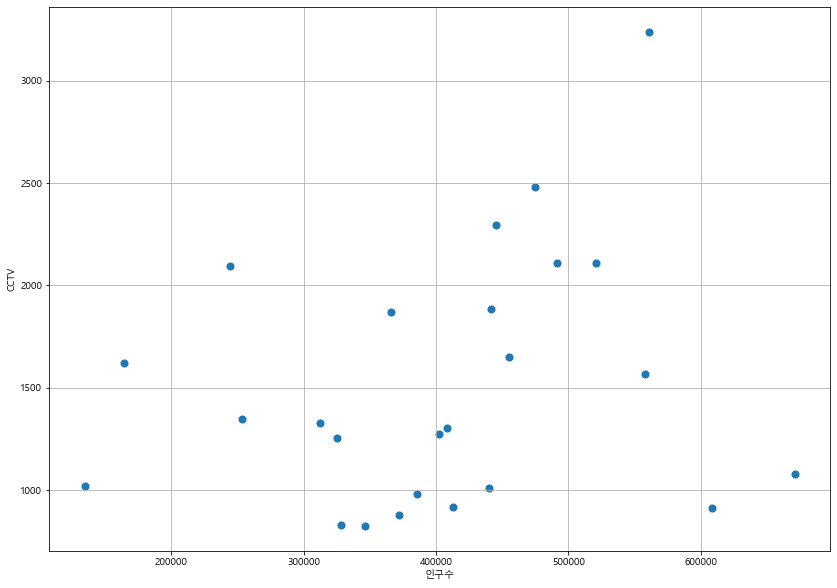

In [175]:
def drawGraph():
    
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result["인구수"], data_result["소계"], s=50)
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid(True)
    plt.show()
drawGraph()    

#### Numpy를 이용한 1차 직선 만들기
- np.polyfit(): 직선을 구성하기 위한 계수를 계산
- np.poly1d(): polyfit으로 찾은 계수로 파이썬에서 사용할 수 있는 함수로 만들어주는 기능 

In [176]:
import numpy as np

In [177]:
fp1 = np.polyfit(data_result["인구수"], data_result["소계"], 1)
fp1

array([1.11155868e-03, 1.06515745e+03])

In [178]:
f1 = np.poly1d(fp1)
f1

poly1d([1.11155868e-03, 1.06515745e+03])

In [179]:
f1(400000)

1509.7809252413333

- 인구가 40만인 구에서 서울시의 전체 경향에 맞는 적당한 CCTV 수는?

In [180]:
fx = np.linspace(100000, 700000, 100)

- 경향선을 그리기 위한 X 데이터 생성
- np.linspace(a, b, n): a부터 b까지 n개의 등간격 데이터 생성

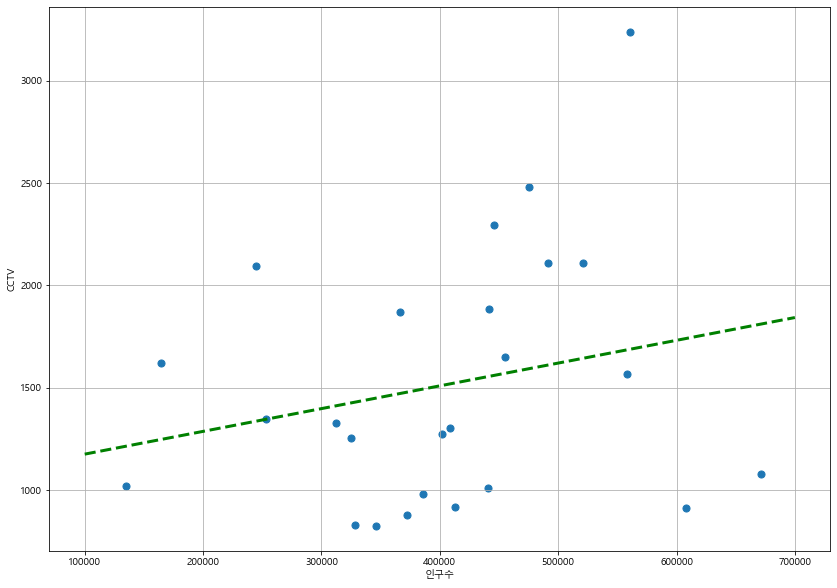

In [181]:
def drawGraph():
    
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result["인구수"], data_result["소계"], s=50)
    plt.plot(fx,f1(fx),ls="--",lw=3,color="green") # 경향선 추가
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid(True)
    plt.show()
drawGraph()    

## 7. 강조하고 싶은 데이터를 시각화해보자

### 그래프 다듬기
#### 경향과의 오차 만들기
- 경향(trend)과의 오차를 만들자
- 경향은 f1 함수에 해당 인구를 입력
- f1(data_result["인구수"])

In [182]:
fp1 = np.polyfit(data_result["인구수"], data_result["소계"], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

In [183]:
data_result.head(3)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352


In [184]:
data_result["오차"] = data_result["소계"] - f1(data_result["인구수"])

In [185]:
data_result.head(1)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.87122,11.596073,0.57713,1549.200326


In [186]:
# 경향과 비교해서 데이터의 오차가 너무 나는 데이터를 계산

df_sort_f = data_result.sort_values(by="오차", ascending=False) # 내림차순
df_sort_t = data_result.sort_values(by="오차", ascending=True) # 오름차순

In [187]:
# 경향 대비 CCTV를 많이 가진 구
df_sort_f.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
양천구,2482,34.671731,475018,471154,3864,55234,0.813443,11.627770,0.522507,888.832166
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456,759.128697
서초구,2297,63.371266,445401,441102,4299,53205,0.965198,11.945415,0.515715,736.753199
은평구,2108,85.237258,491202,486794,4408,74559,0.897390,15.178888,0.429151,496.842700


In [188]:
# 경향 대비 CCTV를 적게 가진 구
df_sort_t.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061,-730.205628
도봉구,825,246.638655,346234,344166,2068,53488,0.597284,15.448512,0.238278,-625.016861
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910,-607.986645
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833,-600.988527


In [189]:
from matplotlib.colors import ListedColormap

# colormap을 사용자 정의(user define)로 세팅
color_step = ["#e74c3c", "#2ecc71", "#95a9a6", "#2ecc71", "#3498db", "#3498db"] # 구글에 '#e74c3c' 검색
my_cmap = ListedColormap(color_step)

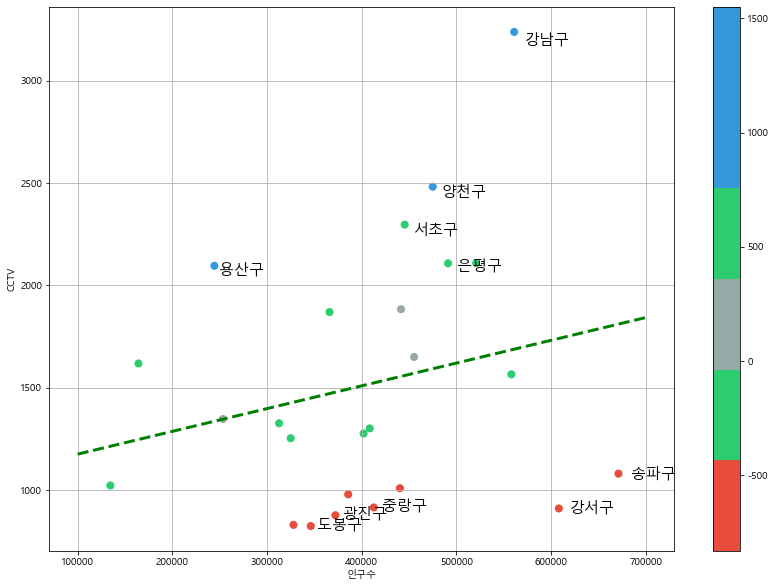

In [190]:
def drawGraph():
    
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result["인구수"], data_result["소계"], s=50, c=data_result["오차"], cmap=my_cmap)
    plt.plot(fx,f1(fx),ls="--",lw=3,color="green") # 경향선 추가
    
    for n in range(5):
        # 상위 5개
        plt.text(
            df_sort_f["인구수"][n] * 1.02, # x 좌표
            df_sort_f["소계"][n] * 0.98, # y 좌표
            df_sort_f.index[n], # title
            fontsize=15,
        )
        
        # 하위 5개
        plt.text(
            df_sort_t["인구수"][n] * 1.02,
            df_sort_t["소계"][n] * 0.98,
            df_sort_t.index[n],
            fontsize=15,
        )
        
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.colorbar()
    plt.grid(True)
    plt.show()
drawGraph()    

In [191]:
data_result.to_csv("C:/Users/고선욱/Documents/ds_study/data/01. CCTV_result.csv", sep=",", encoding="utf-8")

In [192]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358,-544.642322
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352,-598.750923
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854,464.799395


In [193]:
data_result["인구수"][0]

561052

In [194]:
data_result["소계"][0]

3238

In [195]:
data_result.index[0]

'강남구'

---

## merge를 이용하여 병합하기

In [196]:
left = pd.DataFrame(
    {
        "key": ["K0", "K4", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

right = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

In [197]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [198]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [199]:
pd.merge(left, right, on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


- Key 컬럼을 기준으로 병합

In [200]:
pd.merge(left, right, how="left" ,on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


- left에 key를 기준으로 right 병합
- right는 원래 K4가 없었으므로 NaN이 된다

In [201]:
pd.merge(left, right, how="right" ,on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [202]:
pd.merge(left, right, how="outer",on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


- 둘 다 손상되지 않도록 key를 기준으로 병합

In [203]:
pd.merge(left, right, how="inner",on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


- key 컬럼에서 두 데이터에 공통분모만 결합

---

## MATPLOTLIB 기초

In [204]:
import matplotlib.pyplot as plt
# %matplotlib inline
get_ipython().run_line_magic("matplotlib", "inline")
#black 권고 : 아마 정식 코드로 호출해서 사용하라는 의미

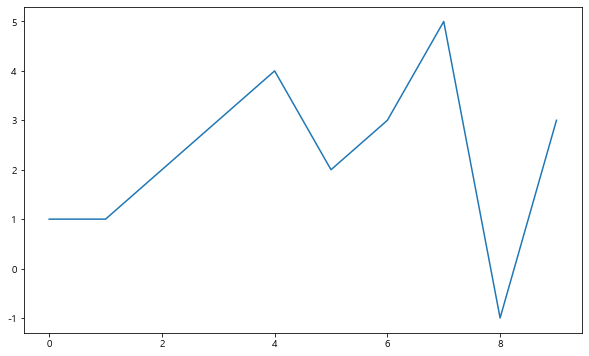

In [205]:
plt.figure(figsize=(10, 6))
plt.plot([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 1, 2, 3, 4, 2, 3, 5, -1, 3]) #(x축값, y축값)
plt.show()

In [206]:
import numpy as np

t = np.arange(0, 12, 0.01)
y = np.sin(t)

#### 삼각함수 그리기
- np.arange(a, b, s) : a부터 b까지 s의 간격
- np.sin(value) : sin함수
- 우리 수업에서는 그래프의 결과가 중요한 경우
- 그래프를 그리는 코드를 def()로 작성한다
- 그러면 나중에 별도의 셀에서 그림만 나타낼 수 있기 때문

In [207]:
def drawGraph():
    plt.figure(figsize=(10, 6))
    plt.plot(t, np.sin(t), label="sin")
    plt.plot(t, np.cos(t), label="cos")
    plt.grid() # 그래프의 격자를 나타낸다
    plt.legend() # 그래프의 범례를 표현
    plt.xlabel("time") # x축 제목
    plt.ylabel("Amplitude") # y축 제목
    plt.title("Example of sinewave") # 그래프 제목
    plt.show()

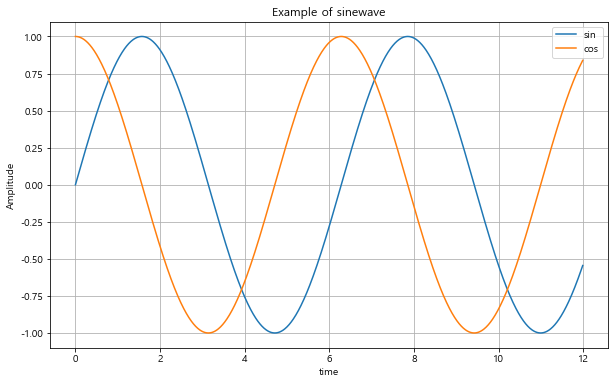

In [208]:
drawGraph()

In [209]:
t = np.arange(0, 5, 0.5)


def drawGraph():
    plt.figure(figsize=(10, 6))
    plt.plot(t, t, "r--") # 빨간색 점선
    plt.plot(t, t ** 2, "bs") # 파란색 사각형
    plt.plot(t, t ** 3, "g^") # 초록색 위로 뾰족한 삼각형
    plt.show()

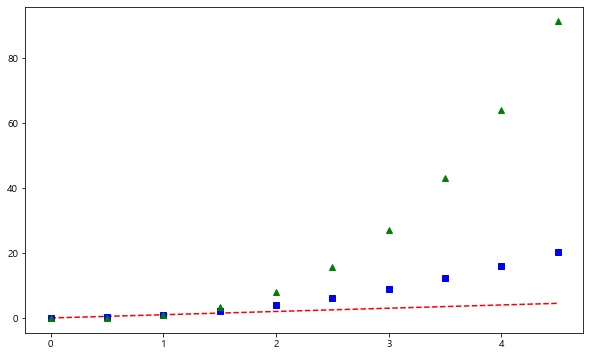

In [210]:
drawGraph()

In [211]:
t = [0 ,1, 2, 3, 4, 5, 6]
y = [1, 4, 5, 8, 9, 5, 3]


# 다양한 스타일을 지정할 수 있다
def drawGraph():
    plt.figure(figsize=(10, 6))
    plt.plot(
        t,
        y,
        color="green", # 선의 색깔은 초록색으로
        linestyle="dashed", # 선의 스타일은 점선으로
        marker="o", # 마커의 모양을 원으로
        markerfacecolor="blue", # 마커의 색상을 파란색으로
        markersize=12, # 마커의 사이즈를 12
    )
        
    plt.xlim([-0.5, 6.5]) # x축 범위
    plt.ylim([0.5, 9.5]) # y축 범위
    plt.show()

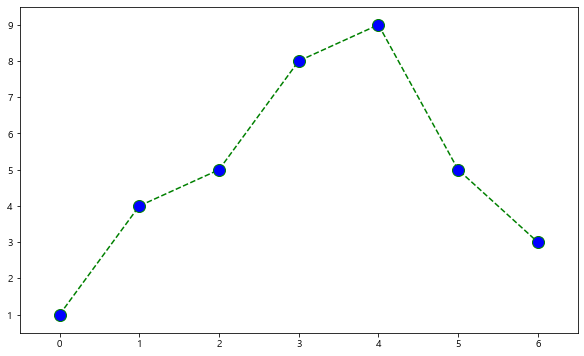

In [212]:
drawGraph()

In [213]:
t = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([9, 8, 7, 9, 8, 3, 2, 4, 3, 4])


# scatter는 점을 뿌리듯이 그리는 그림
def drawGraph():
    plt.figure(figsize=(10, 6))
    plt.scatter(t, y)
    plt.show()

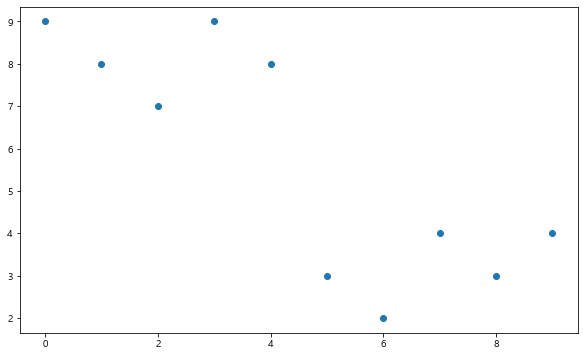

In [214]:
drawGraph()

In [215]:
colormap = t


# colormap을 적용할 수 있다
def drawGraph():
    plt.figure(figsize=(10, 6))
    plt.scatter(t, y, s=50, c=colormap, marker=">") # colormap은 marker의 색상을 수치에 따라 다르게 나타냄, s는 marker사이즈
    plt.colorbar() # colormap의 color값 확인
    plt.show()

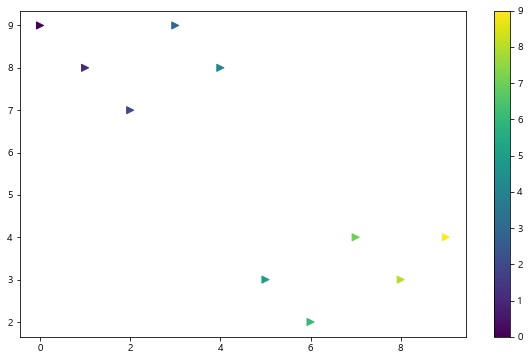

In [216]:
drawGraph()